In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF

In [2]:
coord = np.load("../examples/phbdi/full_coord.npy")

In [3]:
coord = coord[0:1000,:,:]

In [4]:
from scipy.spatial.transform import Rotation

In [5]:
def rmsd(A, B):

    A = A - A.mean(axis=0)
    B = B - B.mean(axis=0)
    H = A.T @ B
    U, S, Vt = np.linalg.svd(H)
    R = Vt.T @ U.T
    A_rot = A @ R
    return np.sqrt(((A_rot - B)**2).sum() / A.shape[0])

In [6]:
nframe = coord.shape[0]
D = np.zeros((nframe, nframe))

for i in range(nframe):
    for j in range(i, nframe):
        d = rmsd(coord[i], coord[j])
        D[i, j] = D[j, i] = d

In [8]:
from sklearn.gaussian_process.kernels import RBF

length_scale = np.median(D)
rbf = RBF(length_scale=length_scale)

K = rbf(D)

In [9]:
diag = np.sqrt(np.diag(K))
K_norm = K / np.outer(diag, diag)


In [19]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(
    n_clusters=50,
    affinity='precomputed'
)

labels = clustering.fit_predict(K_norm)


In [20]:
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

kpca = KernelPCA(
    n_components=2,
    kernel='precomputed'
)

X_2d = kpca.fit_transform(K_norm)


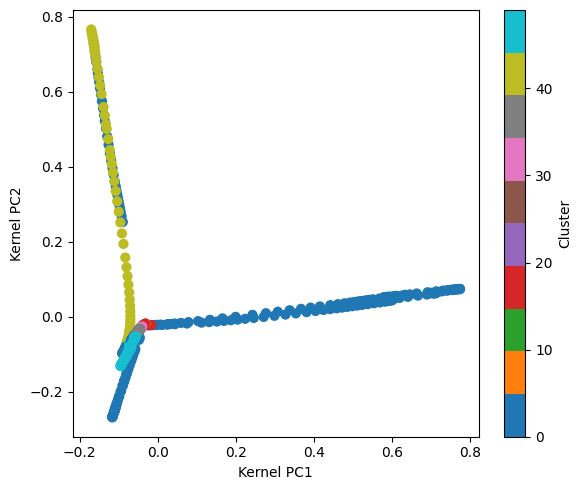

In [21]:
plt.figure(figsize=(6, 5))
scatter = plt.scatter(
    X_2d[:, 0],
    X_2d[:, 1],
    c=labels,
    cmap='tab10',
    s=40
)
plt.xlabel("Kernel PC1")
plt.ylabel("Kernel PC2")
plt.colorbar(scatter, label="Cluster")
plt.tight_layout()
plt.show()


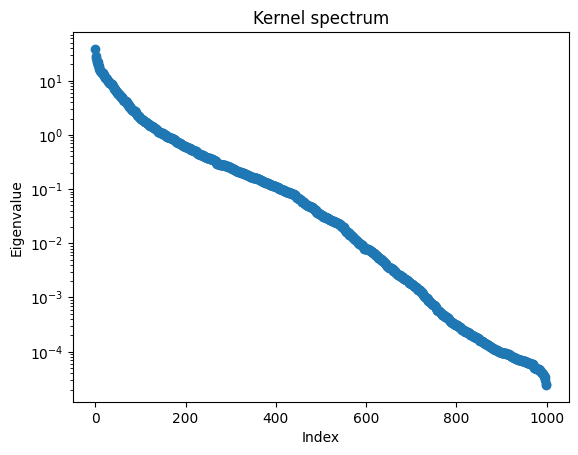

In [14]:
eigvals = np.linalg.eigvalsh(K_norm)

plt.figure()
plt.plot(eigvals[::-1], 'o-')
plt.yscale('log')
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.title("Kernel spectrum")
plt.show()